![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg)

<center>
<h1><font size="+3">GSFC Python Bootcamp</font></h1>
</center>

---
<center>
<H1 style="color:red">
File Input and Output (IO)
</H1>
</center>


In [ ]:
from __future__ import print_function

### Get remote files needed for this lecture

In [ ]:
import urllib3

http = urllib3.PoolManager()


url = 'https://raw.githubusercontent.com/astg606/BeginnerPython/master/io/demo.txt'
response = http.request('GET', url)
txt = response.data.decode('utf-8')

with open('demo123.txt', 'w') as f:
     f.write(txt)

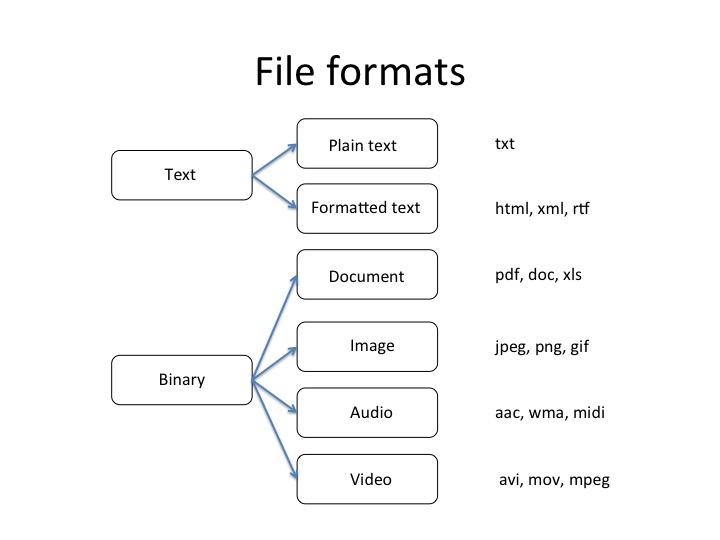

In [1]:
from IPython.display import Image
slide = Image(filename = 'fileFormats.jpg')
slide

### Reading text files

In [ ]:
help(open)

In [ ]:
file_object = open('demo123.txt', 'r') # 'r' is default

A file_object can be treated as a sequence of strings

#### What type of object is file_object?

In [ ]:
print("file_object is of type: ", type(file_object))

In [ ]:
# file_object.<TAB>
dir(file_object) # attributes and methods of file objects

In [ ]:
# Examples
print(file_object.name)
print(file_object.mode)
print(file_object.closed)

### Print all the lines and count the number of lines

In [ ]:
my_file = open ('demo123.txt','r')
count = 0
for line in my_file: # treating my_file as a sequence of strings
    count = count + 1
    print(line)
print("My file has "+str(count)+" lines.")    
my_file.close()

#### Note: Each line includes a non-printing character called the newline character "\n"

### Exercise 
Read the text file demo.txt and count the number of lines excluding empty lines.

### Reading the entire file at once

In [ ]:
my_file = open ('demo123.txt','r')

# read() reads the _entire_ file, returns a string object
data = my_file.read()           
print("Contents of file are of type: ", type(data))

# close file handle
my_file.close()

# Now data is in memory
heading="Contents of file"
print("\n"+heading+"\n"+"-"*len(heading))
print(data)

### Read file chunks

In [ ]:
my_file = open('demo123.txt', 'r')
data = my_file.read()          
#print(data)
while data != "":
   data = my_file.read(64)   # read in 64-byte chunk sizes
   print(data)
my_file.close()

### Read one line at a time

In [ ]:
my_file = open ('demo123.txt')
data = my_file.readline()
print (data)
my_file.close()

### Read all the lines in the text file

In [ ]:
my_file = open ('demo123.txt')
data = my_file.readlines()                        
print(data)                # Note data is a list
my_file.close()

### Exercise 
Read the text file demo.txt and find all instances of the word "Luke"

### Automatically closing files

In [ ]:
# to open a file, process its contents, and make sure to close it, you can simply do:

with open ('demo123.txt', 'r') as f:
    data = f.read() 
    print('--> Is file closed? ', f.closed)
    # file will be closed after exiting this block of code
    
print('<-- Is file closed? ', f.closed)
print(f.mode)

### Summary of open() file access modes

<table style="width:100%">
  <tr>
    <th>Mode</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>r</td>
    <td>Opens a file for reading only. Default mode.</td> 
  </tr>
  <tr>
    <td>rb</td>
    <td>Opens a file for reading only in binary format.</td> 
  </tr>
  <tr>
    <td>r+</td>
    <td>Opens a file for both reading and writing.</td> 
  </tr>
  <tr>
    <td>rb+</td>
    <td>Opens a file for both reading and writing in binary format.</td> 
  </tr>
  <tr>
    <td>w</td>
    <td>Opens a file for writing only. Overwrites file if it exists. Creates a new file if it does not exist.</td> 
  </tr>
  <tr>
    <td>wb</td>
    <td>Opens a file for writing only in binary format.</td> 
  </tr>
  <tr>
    <td>w+</td>
    <td>Opens a file for both writing and reading.</td> 
  </tr>
  <tr>
    <td>wb+</td>
    <td>Opens a file for both writing and reading in binary format.</td> 
  </tr>
    <td>a</td>
    <td>Opens a file for appending. The file pointer is at the end of the file if it exists. </td> 
  </tr>
  <tr>
    <td>ab</td>
    <td>Opens a file for appending in binary format.</td> 
  </tr>
  <tr>
    <td>a+</td>
    <td>Opens a file for both appending and reading.</td> 
  </tr>
  <tr>
    <td>ab+</td>
    <td>Opens a file for both appending and reading in binary format.</td> 
  </tr>
</table>

## Writing Text Files

In [ ]:
# Example:
with open('elements.txt', 'w') as f: # 'w' creates a new file
    f.write('Noble gases:')              
    f.writelines(['He', 'Ne', 'Ar'])  # writelines writes each element on its own

In [ ]:
!cat elements.txt

Note: python will not write '\n' for you

#### 'a+' vs 'r+'

In [ ]:
with open('elements.txt', 'a') as f:  # 'a' is 'append' mode, no reading
    contents = f.read()

In [ ]:
with open('elements.txt', 'a+') as f:  # 'a++' appending and reading
    contents = f.read()               
    print (f.tell())                
    f.write('Kr\n')                    

f.tell() tells me that file pointer is at EOF and I appended 'Kr\n' at that position

In [ ]:
!cat elements.txt

In [ ]:
with open('elements.txt', 'r+') as f: # 'r+' reading and writing
    print (f.tell())                  # file pointer is at 'beginning of file'
    f.write('Halogens:\n')          
    f.writelines(['F\n', 'Cl\n'])

f.tell() tells me that file pointer is at BOF and I wrote text starting at that position

In [ ]:
!cat elements.txt

### Quiz
Write a program that reads file 'demo.txt' and writes out a new file with the lines in reversed order (i.e. the first line in the old file becomes the last one in the new file.)

## Summary of basic file IO functions and methods

<table style="width:100%">
  <tr>
    <th>Methods and functions</th>
    <th>Description</th> 
  </tr>
  <tr>
    <td>open()</td>
    <td>Returns a file object and is most commonly used with two arguments: open(filename, mode)</td> 
  </tr>
  <tr>
    <td>file.close()</td>
    <td>Close the file.</td> 
  </tr>
  <tr>
    <td>file.read([size])</td>
    <td>Read the entire file. If size is specified then read at most size bytes.</td> 
  </tr>
  <tr>
    <td>file.readline([size])</td>
    <td>Read one line from the file. If size is specified then read at most size bytes.</td> 
  </tr>
  <tr>
    <td>file.readlines([size])</td>
    <td>Read all the lines from the file. If size is specified then read at most size bytes.</td> 
  </tr>
  <tr>
    <td>file.tell()</td>
    <td>Returns file object's current position in the file.</td> 
  </tr>
  <tr>
    <td>file.seek(int)</td>
    <td>Changes the file object's current position to the given int.</td> 
  <tr>
    <td>file.write(string)</td>
    <td>Writes the contents of string to the file.</td> 
  </tr>
</table>

### Handling delimited files

In [ ]:
!cat grades.csv

One could use csv package: import csv

In [ ]:
with open('grades.csv', 'r') as f:
    for line in f:
        print(line.strip().split(','))

Each row of the input data is parsed and converted to a list of strings.

### Binary data IO

In [ ]:
s = b"Hello world!"

with open('hello.bin','wb') as f:
    f.write(s)
    
with open('hello.bin','rb') as f:
    data = f.read()
print(data)

with open('hello.bin','rb') as f:
    byte = f.read(1)
    print(byte,)
    while byte != "":
        byte = f.read(1)
        print(byte,)

The differences between binary and ascii encoding won't be obvious for simple alphanumeric strings, but will become important if you're processing text that includes characters not in the ascii character set.

In [ ]:
with open('cat.jpg', 'rb') as f:
    data = f.readline()
print (data)

In [ ]:
':'.join(x.encode('hex') for x in data)

Hex dump is useful for debugging. In a hex dump, each byte (8-bits) is represented as a two-digit hexadecimal number.

In [ ]:
with open('cat.jpg', 'rb') as f:
    data = f.read()
 
    if data.startswith(b'\xff\xd8'):
        info = 'This is a jpeg file (%d bytes long)'
    else:
        info = 'This is a random file (%d bytes long)'

    print (info % len(data))

In [ ]:
from IPython.display import Image
kitty = Image(filename = 'cat.jpg')
kitty

### OS dependent functions

In [ ]:
import os

Python os module provides methods that help you perform all kinds of file-processing operations, such as renaming and deleting files (as well as file IO).

In [ ]:
help(os.read)
fd = os.open('demo.txt', os.O_RDWR)
ret = os.read(fd, 15)
print('Result from os.read:'+'\n'+20*'-'+'\n'+ret)
os.close(fd)

#### You need to test whether or not a file or directory exists.

In [ ]:
print(os.path.exists('/etc/passwd'))
print(os.path.exists('/etc/spam'))

In [ ]:
filename = '/etc/spam'
if os.path.exists(filename):
    with open(filename) as f:
        data = f.readline()
    print(data)    
else:
    print (filename + ' does not exist')

#### List files in current directory

In [ ]:
listdir =  os.listdir(".")
for file in listdir:
   print file

#### Dealing with directories

In [ ]:
os.mkdir("newdir")
os.chdir("newdir")
print(os.getcwd())

In [ ]:
os.chdir("..")
print(os.getcwd())

In [ ]:
os.rmdir("newdir")

#### Accessing environment

In [ ]:
print(os.environ['HOME'])
print(os.environ.has_key("HOME"))

# using get will return `None` if a key is not present rather than raise a `KeyError`
print(os.environ.get('KEY_THAT_MIGHT_EXIST'))

# os.getenv is equivalent, and can also give a default value instead of `None`
print(os.getenv('KEY_THAT_MIGHT_EXIST', 'SOME_KEY'))

# Setting variable
os.environ['PythonTraining'] = 'is fun'
print(os.environ.get('PythonTraining'))

#### Other utilities

In [ ]:
print(os.path.isfile('/etc/passwd'))
print(os.path.isdir('/etc/passwd'))
print(os.path.islink('python'))
print(os.path.realpath('python'))
print(os.path.getsize('/etc/passwd'))

In [ ]:
import shutil

The shutil module offers a number of high-level operations on <b>files and collections of files</b>. In particular, functions are provided which support file copying and removal. 
For operations on individual files, see also the os module.

In [ ]:
help (shutil.copy)
help (shutil.move)

# Extra material

### Python object serialization

The pickle module turns an arbitrary Python object into a series of bytes. This process is also called serialization. 
  - Useful for storing data
  - Inter process communication

In [ ]:
# import the pickle module
import pickle

data1 = [ { 'a':'A', 'b':2, 'c':3.0 } ]
print('DATA:',)
print(data1)

# Use pickle.dumps() to create a string representation of the value of the object.
data_string = pickle.dumps(data1)
print()'PICKLE:', data_string )

By default, the pickle will contain only ASCII characters. 

Once the data is serialized, you can write it to a file, socket, pipe, etc. 
Then later you can read the file and unpickle the data to construct a new 
object with the same values.

In [ ]:
data1 = [ { 'a':'A', 'b':2, 'c':3.0 } ]
print('BEFORE:',)
print(data1)

data2 = pickle.loads(data_string)
print('AFTER:',)
print(data2)

print('EQUAL?:', (data1 == data2))
print('SAME ?:', (data1 is data2))

#### Write pickled data to a file

In [ ]:
import pickle
with open('pickledData.bin', 'wb') as f:
    pickle.dump(data1, f)
with open('pickledData.bin', 'rb') as f:
    data2 = pickle.load(f)
print('Data:',)
print(data1)
print('EQUAL?:', (data1 == data2))

### File position

In [ ]:
with open ('demo.txt') as f:
    f.seek(5)                   # seek(offset) Changes file object's position
    data = f.readline() 
    print (data)

In [ ]:
with open ('demo.txt') as f:
    f.seek(5)
    data = f.readline() 
    print (data)
    k = f.tell()              # tell() returns current position in file
    print (k)

### Using print  to automatically add new lines

In [ ]:
with open ('elementsWithNewLine.txt', 'w') as f:
    print('Noble gases', file=f)       # print automatically adds newline
    for gas in ['He', 'Ne', 'Ar', 'Kr']:
        print(gas, file=f)

In [ ]:
!cat elementsWithNewLine.txt